Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [5]:
df.shape

(200000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
#Description of dataset
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [9]:
# Convert pickup_datetime to datetime format if it's not already
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
print(df['pickup_datetime'])

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]


In [10]:
# Extract useful information from datetime
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [11]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
hour                 0
day_of_week          0
dtype: int64


In [12]:
# Remove null values
df.dropna(inplace=True)

In [13]:
# Verify that there are no missing values left
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day_of_week          0
dtype: int64


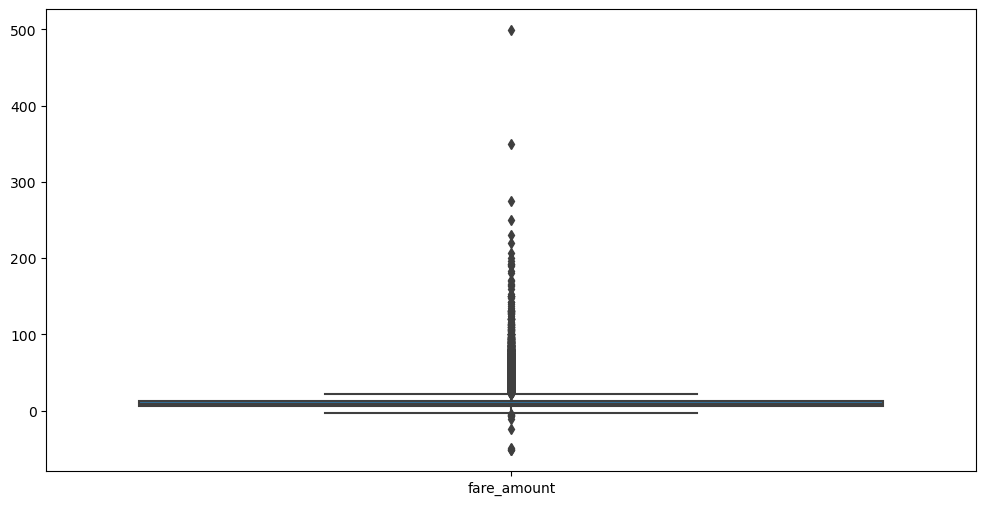

In [14]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['fare_amount']])
plt.show()

In [15]:
# Remove outliers based on fare_amount
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]
# Identify outliers
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] >upper_bound)]
# Display the outliers
print("Outliers based on fare_amount:")
print(outliers)

Outliers based on fare_amount:
Empty DataFrame
Columns: [Unnamed: 0, key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, hour, day_of_week]
Index: []


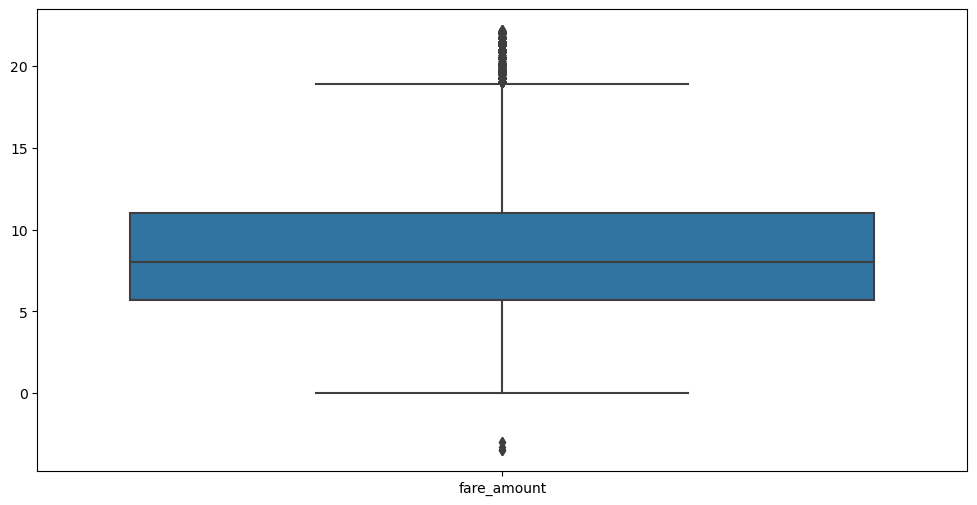

In [17]:
# Recheck the boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['fare_amount']])
plt.show()

In [18]:
# Select only the numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
# Display the correlation matrix
print(corr_matrix)

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000    -0.000192          0.000490        -0.001194   
fare_amount         -0.000192     1.000000          0.000367         0.002618   
pickup_longitude     0.000490     0.000367          1.000000        -0.812047   
pickup_latitude     -0.001194     0.002618         -0.812047         1.000000   
dropoff_longitude    0.000835    -0.002413          0.835950        -0.767103   
dropoff_latitude    -0.000488     0.000589         -0.850574         0.684558   
passenger_count      0.002472     0.012618         -0.000751        -0.001604   
hour                 0.001714    -0.013219          0.003544        -0.004675   
day_of_week         -0.004909     0.020082         -0.000480        -0.000743   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
Unnamed: 0                  0.000835         -0.000488         0.002472   
fare_amount                -0.002413   

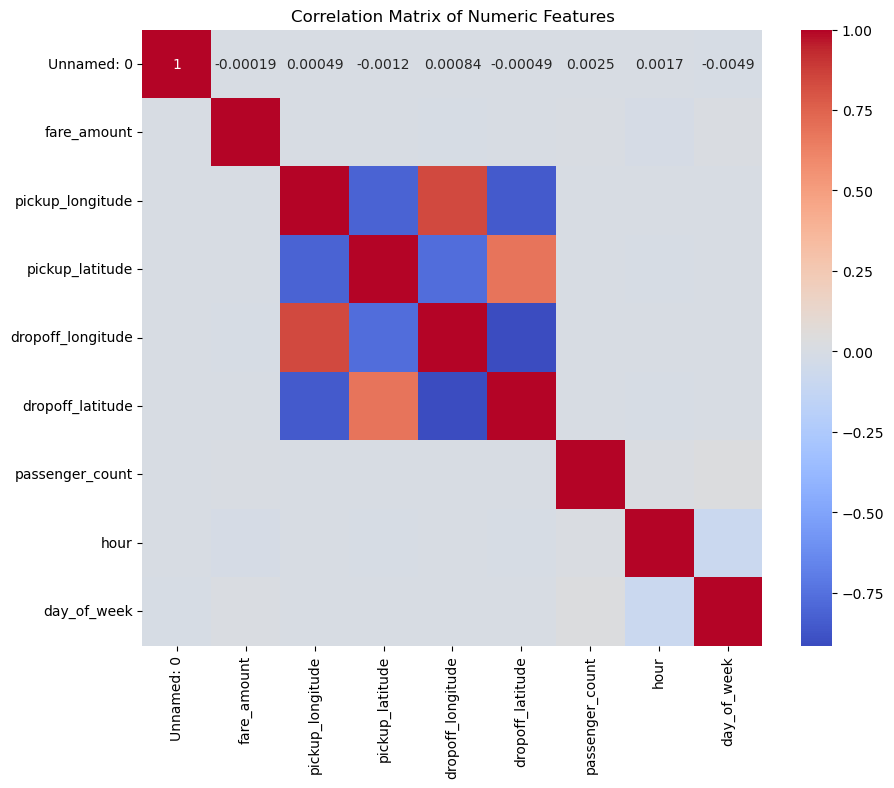

In [19]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

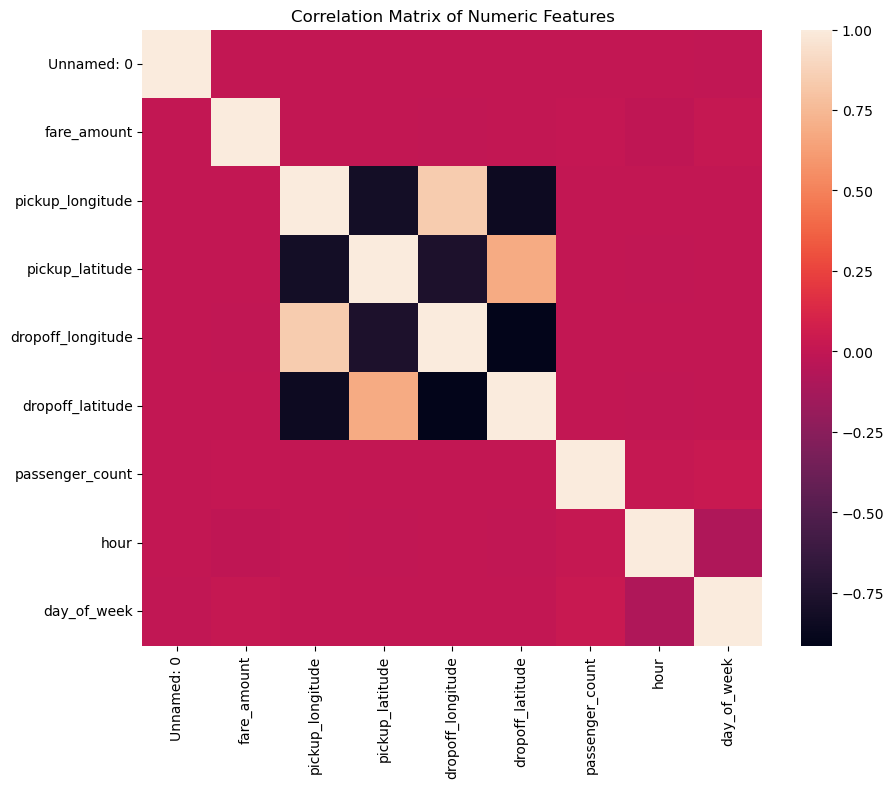

In [20]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [21]:
# Select features based on correlation
features = ['hour', 'day_of_week', 'passenger_count'] # Modify based on␣correlation matrix
target = 'fare_amount'
# Split the data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [22]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Predict using the model
y_pred_lr = lr_model.predict(X_test)

In [23]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict using the model
y_pred_rf = rf_model.predict(X_test)

In [24]:
# Define a function to calculate evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} - R2 Score: {r2:.2f}")
    print(f"{model_name} - RMSE: {rmse:.2f}")
    print(r2)
# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
# Evaluate Random Forest Regression
evaluate_model(y_test, y_pred_rf, 'Random Forest Regression')

Linear Regression - R2 Score: 0.00
Linear Regression - RMSE: 4.16
0.0006956568272566965
Random Forest Regression - R2 Score: -0.00
Random Forest Regression - RMSE: 4.16
-0.0028322707057559793
